In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('../statementofwork/training.csv')
train_df.drop(columns=['segment_id', 'wellbore_chev_no_id'], inplace=True)
train_df.head()

,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,area_0,formation_62,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,area_0,formation_61,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,area_0,formation_59,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,area_0,formation_65,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,area_0,formation_65,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


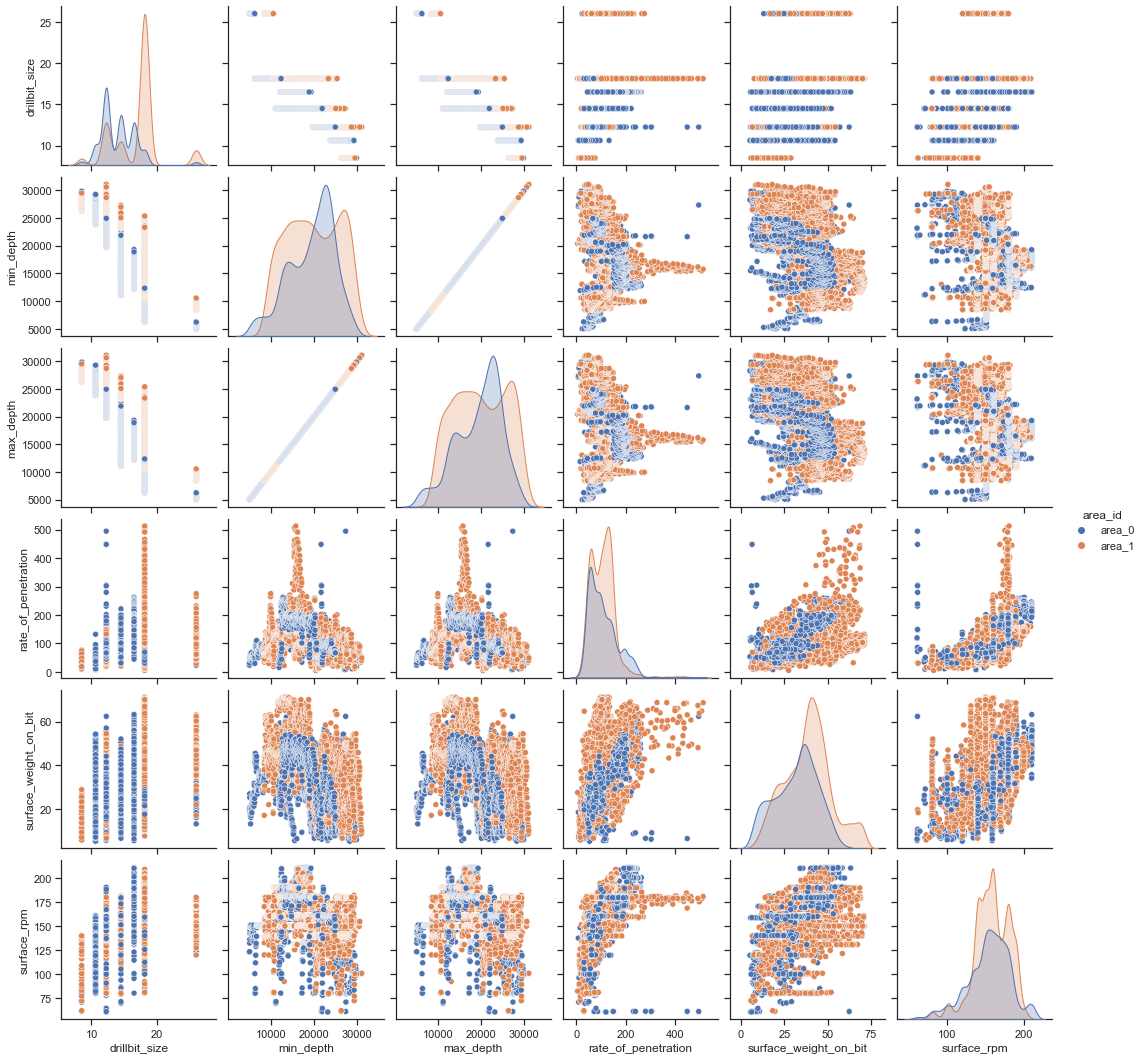

In [3]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(train_df, hue = 'area_id')

In [5]:
test_df = pd.read_csv('../statementofwork/test.csv')
test_df.head()

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_14_665,wellbore_chev_no_14,area_1,formation_220,bit_model_10,18.125,19950.0,19950.0,21.660570,60.655739
1,wellbore_chev_no_14_681,wellbore_chev_no_14,area_1,formation_215,bit_model_10,18.125,20452.0,20459.5,27.768233,160.737708
2,wellbore_chev_no_14_682,wellbore_chev_no_14,area_1,formation_215,bit_model_10,18.125,20460.0,20489.5,28.667844,159.185793
3,wellbore_chev_no_14_683,wellbore_chev_no_14,area_1,formation_213,bit_model_10,18.125,20490.0,20519.5,24.379720,160.027321
4,wellbore_chev_no_14_684,wellbore_chev_no_14,area_1,formation_213,bit_model_10,18.125,20520.0,20549.5,23.551256,151.726782


In [7]:
# One-hot encode the data using pandas get_dummies
train_df = pd.get_dummies(train_df)
# Display the first 5 rows of the last 12 columns
train_df.iloc[:,5:].head(5)

,surface_rpm,area_id_area_0,area_id_area_1,formation_id_formation_0,formation_id_formation_1,formation_id_formation_100,formation_id_formation_101,formation_id_formation_102,formation_id_formation_103,formation_id_formation_104,...,bit_model_id_bit_model_34,bit_model_id_bit_model_36,bit_model_id_bit_model_37,bit_model_id_bit_model_39,bit_model_id_bit_model_4,bit_model_id_bit_model_40,bit_model_id_bit_model_42,bit_model_id_bit_model_43,bit_model_id_bit_model_6,bit_model_id_bit_model_8
0,150.369091,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,150.369001,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,150.429335,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,150.080000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,150.032167,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(train_df['rate_of_penetration'])
# Remove the labels from the features
# axis 1 refers to the columns
train_df= train_df.drop('rate_of_penetration', axis = 1)
# Saving feature names for later use
train_df_list = list(train_df.columns)
# Convert to numpy array
train_df = np.array(train_df)

In [10]:
#the split
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(train_df, labels, test_size = 0.2, random_state = 42)

In [11]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5470, 284)
Training Labels Shape: (5470,)
Testing Features Shape: (1368, 284)
Testing Labels Shape: (1368,)


In [12]:
#TRAIN the MODEL
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

# Make Predictions on the Test Set

In [13]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 9.99


In [14]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.74 %.


# VISUALIZE

In [25]:
import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + '.'
print (os.environ["PATH"])
os.environ["PATH"] += os.pathsep + '../'

/usr/local/bin:/Library/Frameworks/Python.framework/Versions/3.10/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/Frameworks/Mono.framework/Versions/Current/Commands:C:/Program Files (x86)/Graphviz2.38/bin/:../:../:.:../:.:../:.


In [26]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = train_df_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

FileNotFoundError: [Errno 2] "dot" not found in path.

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = train_df_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

# FEATURE IMPORTANCE

In [27]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_df_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: surface_rpm          Importance: 0.45
Variable: surface_weight_on_bit Importance: 0.16
Variable: min_depth            Importance: 0.09
Variable: max_depth            Importance: 0.09
Variable: bit_model_id_bit_model_20 Importance: 0.06
Variable: drillbit_size        Importance: 0.04
Variable: bit_model_id_bit_model_17 Importance: 0.04
Variable: bit_model_id_bit_model_11 Importance: 0.01
Variable: area_id_area_0       Importance: 0.0
Variable: area_id_area_1       Importance: 0.0
Variable: formation_id_formation_0 Importance: 0.0
Variable: formation_id_formation_1 Importance: 0.0
Variable: formation_id_formation_100 Importance: 0.0
Variable: formation_id_formation_101 Importance: 0.0
Variable: formation_id_formation_102 Importance: 0.0
Variable: formation_id_formation_103 Importance: 0.0
Variable: formation_id_formation_104 Importance: 0.0
Variable: formation_id_formation_105 Importance: 0.0
Variable: formation_id_formation_106 Importance: 0.0
Variable: formation_id_formation_

# Visualize Variable Importance

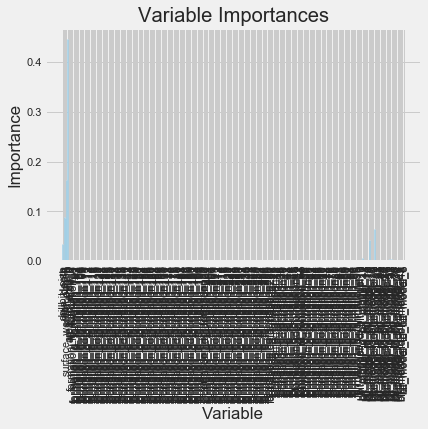

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, train_df_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [50]:
rf.predict(test_features[0:1])

array([243.57463054])

In [51]:
print(test_features[0:1])

[[1.81250000e+01 1.48500000e+04 1.48797500e+04 5.81631934e+01
  1.75168067e+02 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0000

In [56]:
print(train_df_list)

['drillbit_size', 'min_depth', 'max_depth', 'surface_weight_on_bit', 'surface_rpm', 'area_id_area_0', 'area_id_area_1', 'formation_id_formation_0', 'formation_id_formation_1', 'formation_id_formation_100', 'formation_id_formation_101', 'formation_id_formation_102', 'formation_id_formation_103', 'formation_id_formation_104', 'formation_id_formation_105', 'formation_id_formation_106', 'formation_id_formation_108', 'formation_id_formation_109', 'formation_id_formation_11', 'formation_id_formation_110', 'formation_id_formation_111', 'formation_id_formation_112', 'formation_id_formation_113', 'formation_id_formation_114', 'formation_id_formation_115', 'formation_id_formation_116', 'formation_id_formation_117', 'formation_id_formation_118', 'formation_id_formation_119', 'formation_id_formation_12', 'formation_id_formation_120', 'formation_id_formation_121', 'formation_id_formation_122', 'formation_id_formation_123', 'formation_id_formation_124', 'formation_id_formation_125', 'formation_id_fo